<a href="https://colab.research.google.com/github/alejomd17/Series-de-tiempo-en-Python/blob/main/Series_Temporales_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

%matplotlib inline

# Datos

In [19]:
df = pd.read_excel('Datos.xlsx')

In [20]:
df.head(5)

,year,unem,inf,unem_1,inf_1,unem_2,inf_2,cunem,cinf,cunem_1,cinf_1,u,time
0,1948,3.8,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038,1
1,1949,5.9,-1.2,3.8,8.1,NaN,NaN,2.1,-9.3,NaN,NaN,0.059,2
2,1950,5.3,1.3,5.9,-1.2,3.8,8.1,-0.6,2.5,2.1,-9.3,0.053,3
3,1951,3.3,7.9,5.3,1.3,5.9,-1.2,-2.0,6.6,-0.6,2.5,0.033,4
4,1952,3.0,1.9,3.3,7.9,5.3,1.3,-0.3,-6.0,-2.0,6.6,0.030,5


# Elegir las variables de interés

In [114]:
df_inf = pd.DataFrame(df[['year','inf']])

In [33]:
df_inf

,year,inf
0,1948,8.1
1,1949,-1.2
2,1950,1.3
3,1951,7.9
4,1952,1.9
5,1953,0.8
6,1954,0.7
7,1955,-0.4
8,1956,1.5
9,1957,3.3


In [23]:
df_inf.head(5)

,year,inf
0,1948,8.1
1,1949,-1.2
2,1950,1.3
3,1951,7.9
4,1952,1.9


# Tendencia

In [43]:
n = len(df_inf)
x = np.array(df_inf['year'])
y = np.array(df_inf['inf'])
sumx = sum(x)
sumy = sum(y)
sumx2 = sum(x*x)
sumy2 = sum(y*y)
sumxy = sum(x*y)
promx = np.average(x)
promy = np.average(y)
m = (sumx*sumy-n*sumxy)/(sumx**2-n*sumx2)
b = promy-m*promx
m,b

(0.0668163265306262, -127.65363265308876)

In [47]:
df_inf['trend_inf'] = m*x+b

In [48]:
df_inf.head(5)

,year,inf,trend_inf
0,1948,8.1,2.504571
1,1949,-1.2,2.571388
2,1950,1.3,2.638204
3,1951,7.9,2.705020
4,1952,1.9,2.771837


# Gráficar

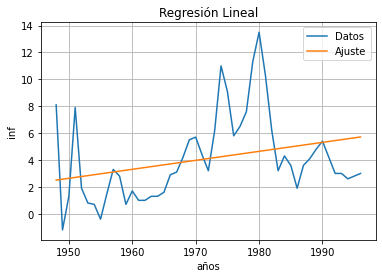

In [52]:
plt.plot(x,y, label='Datos')
plt.plot(x,m*x+b,label='Ajuste')
plt.xlabel('años')
plt.ylabel('inf')
plt.title('Regresión Lineal')
plt.grid()
plt.legend(loc=1)
plt.show()

# Regresión Lineal

In [61]:
year = df_inf['year'].values.reshape(-1,1)
inf = df_inf['inf'].values.reshape(-1,1)
trend_inf = df_inf['trend_inf'].values.reshape(-1,1)

## Años (x) vs Inflación (y)

In [77]:
model = LinearRegression()
model.fit(year,inf)
model.intercept_, model.coef_

(array([-127.65363265]), array([[0.06681633]]))

In [80]:
year = sm.add_constant(year,prepend=True)
model_ = sm.OLS(inf,year)
model_ = model_.fit()
print(model_.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     4.647
Date:                Fri, 08 Oct 2021   Prob (F-statistic):             0.0363
Time:                        15:48:27   Log-Likelihood:                -123.44
No. Observations:                  49   AIC:                             250.9
Df Residuals:                      47   BIC:                             254.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -127.6536     61.125     -2.088      0.0

# Determinar el tipo de modelo, Estacionario o no.

In [83]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

#Estadísticas de la determinación del balanceo (Media móvil y Desviación Estándar)
    rolmean = pd.rolling_mean(timeseries,window=12)
    rolstd = pd.rolling_std(timeseries,window=12)
#Graficar las estadísticas del balanceo
    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(rolmean,color='red',label='Media Móvil')
    std = plt.plot(rolstd,color='black',label='Desviación Estándar')
    plt.legend(loc='best')
    plt.title('Media Móvil y Desviación Estándar')
    plt.show(block=False)
    test_stationarity(df_inf['inf'])

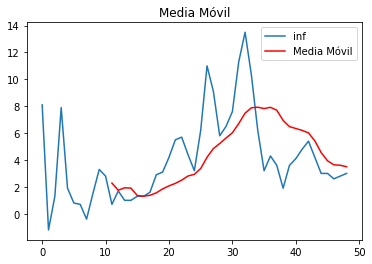

In [95]:
# Cálculo de la media móvil
moving_avg = pd.Series(df_inf['inf']).rolling(window=12).mean()
df_inf['inf'].plot()
#Gráfica de la media móvil
moving_avg.plot(label='Media Móvil',color='red')
plt.title('Media Móvil')
plt.legend(loc='best')

Text(0.5, 1.0, 'Variación anual')

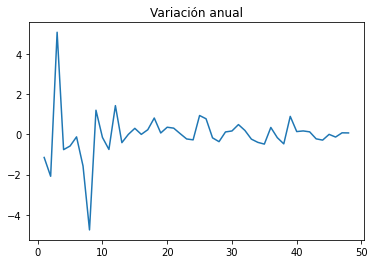

In [96]:
#Cálculo de la varianza
variaciones_anual = df_inf['inf']/df_inf['inf'].shift(1)-1
df_inf['variacion_anual']=variaciones_anual
df_inf['variacion_anual'][:5]
#Gráfica de la varianza
plot = df_inf['variacion_anual'].plot()
plt.title('Variación anual')

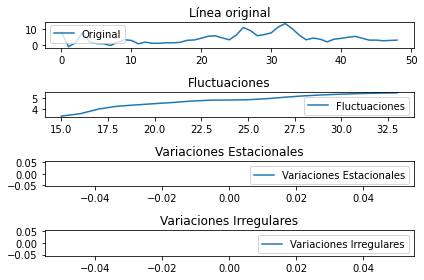

In [101]:
#Cálculo de la línea de tendencia sobre los datos
#Gráfica de tendencia aplicando el filtro Hodrick-Prescott
ciclo, tend = sm.tsa.filters.hpfilter(df_inf['inf']) #aplica el filtro
df_inf['Tendencia']=tend
df_inf[['inf','Tendencia']].plot(fontsize=12); #Gráfica de la tendencia
plt.title('Tendencia')
legend = plt.legend()
legend.prop.set_size(14)

#Descomposición de los componentes de la serie de tiempo
descomposicion = sm.tsa.seasonal_decompose(df_inf['inf'],freq=30)

trend = descomposicion.trend
seasonal = descomposicion.seasonal
residual = descomposicion.resid

plt.subplot(411)
plt.plot(df_inf['inf'],label='Original')
plt.title('Línea original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Fluctuaciones')
plt.title('Fluctuaciones')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Variaciones Estacionales')
plt.title('Variaciones Estacionales')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Variaciones Irregulares')
plt.title('Variaciones Irregulares')
plt.legend(loc='best')
plt.tight_layout()

#ARIMA sobre los datos

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


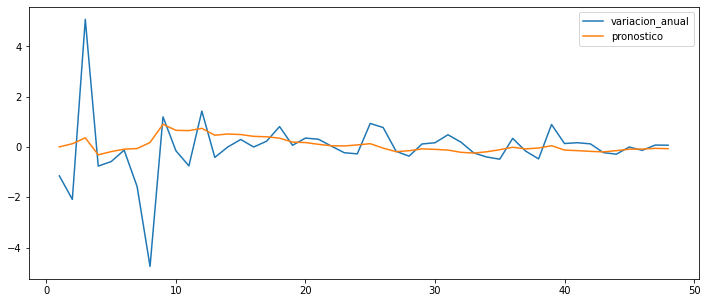

In [103]:
modelo = sm.tsa.ARIMA(df_inf['variacion_anual'].iloc[1:],order =(1,0,1))
resultados = modelo.fit(disp=-1)
df_inf['pronostico']=resultados.fittedvalues
plot = df_inf[['variacion_anual','pronostico']].plot(figsize=(12,5))

fuente: https://www.youtube.com/watch?v=NeRjp3GIJgA&ab_channel=TICUTMACH